In [3]:
# Getting the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
from config import weather_api_key
import requests

# Import the time library and the datetime module from the datetime library\

import time
from datetime import datetime

In [4]:
# Generating random sets of latitude and longitudes.

lats = np.random.uniform(-90,90, size=1500)
lngs = np.random.uniform(-180,180, size=1500)

lat_lngs = zip(lats,lngs)
lat_lngs

In [5]:
# Saving the coordinates on a List.

coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.

cities = []

# Using citipy in coordinates.

for coordinate in coordinates:
    city = (citipy.nearest_city(coordinate[0],coordinate[1]).city_name)
    
    if city not in cities:
        cities.append(city)
        
len(cities)

619

In [17]:
# Creating URL API to make the hits.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [26]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.

record_count = 1
set_count = 1

# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
# Run an API request for each of the cities.

    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.

    except:
        
        print("City not found. Skipping...")
        
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fare
Processing Record 2 of Set 1 | saldanha
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | lavrentiya
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | cidreira
Processing Record 10 of Set 1 | puerto del rosario
Processing Record 11 of Set 1 | katsuura
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | nioro
Processing Record 16 of Set 1 | maceio
Processing Record 17 of Set 1 | kuching
Processing Record 18 of Set 1 | torbay
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | sorvag
City not found. Skipping...
Processing Record 22 of Set 1 |

City not found. Skipping...
Processing Record 34 of Set 4 | samarai
Processing Record 35 of Set 4 | jatiroto
Processing Record 36 of Set 4 | neryungri
Processing Record 37 of Set 4 | sioux lookout
Processing Record 38 of Set 4 | lisala
Processing Record 39 of Set 4 | tagusao
Processing Record 40 of Set 4 | lac-megantic
Processing Record 41 of Set 4 | kamenka
Processing Record 42 of Set 4 | barrow
Processing Record 43 of Set 4 | sur
Processing Record 44 of Set 4 | angoche
Processing Record 45 of Set 4 | faanui
Processing Record 46 of Set 4 | havoysund
Processing Record 47 of Set 4 | grand haven
Processing Record 48 of Set 4 | luderitz
Processing Record 49 of Set 4 | mwene-ditu
Processing Record 50 of Set 4 | sept-iles
Processing Record 1 of Set 5 | westport
Processing Record 2 of Set 5 | gamba
Processing Record 3 of Set 5 | leningradskiy
Processing Record 4 of Set 5 | tasiilaq
Processing Record 5 of Set 5 | berlevag
Processing Record 6 of Set 5 | nikolskoye
Processing Record 7 of Set 5 

Processing Record 22 of Set 8 | constitucion
Processing Record 23 of Set 8 | kandrian
Processing Record 24 of Set 8 | nouakchott
Processing Record 25 of Set 8 | victor harbor
Processing Record 26 of Set 8 | praia da vitoria
Processing Record 27 of Set 8 | maykain
City not found. Skipping...
Processing Record 28 of Set 8 | yeppoon
Processing Record 29 of Set 8 | tolaga bay
Processing Record 30 of Set 8 | xichang
Processing Record 31 of Set 8 | humaita
Processing Record 32 of Set 8 | qandala
Processing Record 33 of Set 8 | namibe
Processing Record 34 of Set 8 | mount gambier
Processing Record 35 of Set 8 | santa cruz del sur
Processing Record 36 of Set 8 | torrington
Processing Record 37 of Set 8 | ostrovnoy
Processing Record 38 of Set 8 | kununurra
Processing Record 39 of Set 8 | phuket
Processing Record 40 of Set 8 | iberia
Processing Record 41 of Set 8 | eydhafushi
Processing Record 42 of Set 8 | bereda
Processing Record 43 of Set 8 | salalah
Processing Record 44 of Set 8 | vaitupu
Ci

Processing Record 12 of Set 12 | santa clara
Processing Record 13 of Set 12 | codajas
Processing Record 14 of Set 12 | pathardih
Processing Record 15 of Set 12 | indramayu
Processing Record 16 of Set 12 | qaqortoq
Processing Record 17 of Set 12 | jiwani
Processing Record 18 of Set 12 | dwarka
Processing Record 19 of Set 12 | nhulunbuy
Processing Record 20 of Set 12 | glen allen
Processing Record 21 of Set 12 | stutterheim
Processing Record 22 of Set 12 | jijiga
Processing Record 23 of Set 12 | santarem
Processing Record 24 of Set 12 | alice town
Processing Record 25 of Set 12 | meyungs
City not found. Skipping...
Processing Record 26 of Set 12 | brownwood
Processing Record 27 of Set 12 | salmon creek
Processing Record 28 of Set 12 | evensk
Processing Record 29 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 30 of Set 12 | chimore
Processing Record 31 of Set 12 | pobe
Processing Record 32 of Set 12 | powell river
Processing Record 33 of Set 12 | rassvet
Processin

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fare,-16.7000,-151.0167,81.03,73,71,15.52,PF,2022-05-17 20:49:42
1,Saldanha,-33.0117,17.9442,71.65,48,100,12.35,ZA,2022-05-17 20:45:04
2,New Norfolk,-42.7826,147.0587,47.91,76,66,1.01,AU,2022-05-17 20:49:43
3,Vaini,-21.2000,-175.2000,75.36,78,40,6.91,TO,2022-05-17 20:49:43
4,Lavrentiya,65.5833,-171.0000,30.02,77,65,4.90,RU,2022-05-17 20:49:45
5,Qaanaaq,77.4840,-69.3632,25.65,76,40,5.26,GL,2022-05-17 20:49:45
6,East London,-33.0153,27.9116,70.72,51,0,6.76,ZA,2022-05-17 20:49:46
7,Cidreira,-30.1811,-50.2056,53.28,73,70,28.41,BR,2022-05-17 20:49:46
8,Puerto Del Rosario,28.5004,-13.8627,71.35,68,20,13.80,ES,2022-05-17 20:49:47
9,Katsuura,35.1333,140.3000,62.38,86,91,1.83,JP,2022-05-17 20:49:47


In [30]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.tail(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
556,Port Augusta,AU,2022-05-17 21:09:03,-32.5000,137.7667,52.81,76,100,4.41
557,Teguldet,RU,2022-05-17 21:09:06,57.3064,88.1667,62.13,65,65,9.17
558,Vila,PT,2022-05-17 21:09:06,42.0304,-8.1588,53.71,91,80,3.56
559,Santa Isabel Do Rio Negro,BR,2022-05-17 21:09:07,-0.4139,-65.0192,77.72,97,94,1.07
560,Kijang,KR,2022-05-17 21:06:37,35.2442,129.2139,61.79,63,0,5.82
561,Penzance,GB,2022-05-17 21:04:47,50.1186,-5.5371,56.08,87,14,24.56
562,Ust-Omchug,RU,2022-05-17 21:09:10,61.1500,149.6333,30.96,86,99,4.83
563,Boca Do Acre,BR,2022-05-17 21:09:10,-8.7522,-67.3978,77.86,60,82,4.83
564,La Macarena,CO,2022-05-17 21:09:11,2.1837,-73.7849,79.02,91,98,2.37
565,Jawhar,SO,2022-05-17 21:09:12,2.7809,45.5005,77.27,81,68,13.09


In [31]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [6]:
# To avoid having to run the process to gather data again. We restarted the day here trhough the CSV file saved.
# DO NOT FORGET to run the import cells in the begining.





# Exporting the CSV File with the weather results.

file_to_load = "weather_data/cities.csv"
city_data_df = pd.read_csv(file_to_load)
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Fare,PF,2022-05-17 20:49:42,-16.7000,-151.0167,81.03,73,71,15.52
1,1,Saldanha,ZA,2022-05-17 20:45:04,-33.0117,17.9442,71.65,48,100,12.35
2,2,New Norfolk,AU,2022-05-17 20:49:43,-42.7826,147.0587,47.91,76,66,1.01
3,3,Vaini,TO,2022-05-17 20:49:43,-21.2000,-175.2000,75.36,78,40,6.91
4,4,Lavrentiya,RU,2022-05-17 20:49:45,65.5833,-171.0000,30.02,77,65,4.90


In [7]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

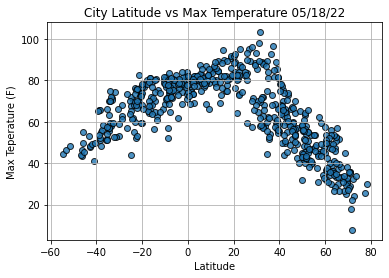

In [12]:
# Building a scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label = "Cities")

# Incorporating the other graph properties.

plt.title("City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Teperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the image.

plt.savefig("weather_data/Fig1.png")

# Show plot

plt.show()

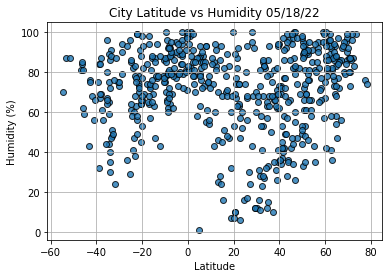

In [11]:
# Building a scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label = "Cities")

# Incorporating the other graph properties.

plt.title("City Latitude vs Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the image.

plt.savefig("weather_data/Fig2.png")

# Show plot

plt.show()

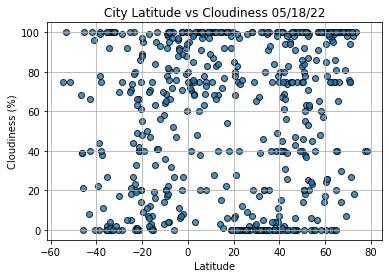

In [13]:
# Building a scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label = "Cities")

# Incorporating the other graph properties.

plt.title("City Latitude vs Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the image.

plt.savefig("weather_data/Fig3.png")

# Show plot

plt.show()

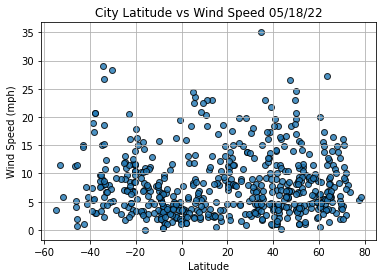

In [14]:
# Building a scatter plot for latitude vs. max temperature.

plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label = "Cities")

# Incorporating the other graph properties.

plt.title("City Latitude vs Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Saving the image.

plt.savefig("weather_data/Fig4.png")

# Show plot

plt.show()